In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler , LabelEncoder
from xgboost import XGBRegressor

## Core Features:
- ####  listing_id: Unique identifier
- ####	price_egp: Listing price in Egyptian Pounds (target variable)
- ####	area_sqm: Apartment size in square meters
- ####	bedrooms: Number of bedrooms (focus on 2-3)
- ####	bathrooms: Number of bathrooms
- ####	floor_number: Which floor (1-20)
- ####	building_age_years: Age of the building

## Location Details:
- #### district: New Cairo sub-district (e.g., Fifth Settlement, Katameya, Rehab, Madinaty)
- #### compound_name: Residential compound (if applicable)
- #### distance_to_auc_km: Distance to American University in Cairo
- #### distance_to_mall_km: Distance to nearest major mall
- #### distance_to_metro_km: Distance to nearest metro station (future New Cairo line)

## Property Characteristics:
- #### finishing_type: Super Lux / Lux / Semi-finished / Unfinished
- #### has_balcony: Yes/No
- #### has_parking: Yes/No
- #### has_security: 24/7 security (Yes/No)
- #### has_amenities: Pool, gym, green spaces (Yes/No)
- #### view_type: Street / Garden / Nile (rare) / Compound

## Market Context:
- #### listing_date: When posted
- #### days_on_market: Days since listing
- #### seller_type: Owner / Broker
- #### is_negotiable: Price negotiable (Yes/No)


In [36]:
df = pd.read_csv("D:\DEPI\Trial code\CaseStudy\Data\cairo_real_estate_dataset.csv")
df

,listing_id,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,...,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,listing_date,days_on_market,seller_type,is_negotiable
0,NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,NaN,15.9,...,Lux,Yes,Yes,Yes,No,Garden,2025-08-23,76,Broker,Yes
1,NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,NaN,23.8,...,Lux,Yes,Yes,Yes,Yes,Compound,2025-08-12,87,Broker,Yes
2,NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,NaN,9.8,...,Lux,Yes,Yes,Yes,Yes,Garden,2025-09-20,48,Broker,Yes
3,NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,...,Lux,Yes,Yes,Yes,Yes,Street,2025-09-10,58,Broker,Yes
4,NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,...,Lux,Yes,No,Yes,No,Street,2025-09-11,57,Owner,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,NaN,9.7,...,Lux,No,Yes,Yes,Yes,Street,2025-09-27,41,Broker,Yes
1996,NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,...,Semi-finished,Yes,No,Yes,Yes,Garden,2025-09-22,46,Owner,Yes
1997,NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,...,Super Lux,Yes,Yes,No,No,Garden,2025-08-21,78,Owner,Yes
1998,NCR-2024-01999,2050000,97,2,3,8,14,Rehab City,NaN,16.4,...,Unfinished,Yes,Yes,Yes,No,Garden,2025-06-20,140,Broker,Yes


# Data Exploration

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            2000 non-null   object 
 1   price_egp             2000 non-null   int64  
 2   area_sqm              2000 non-null   int64  
 3   bedrooms              2000 non-null   int64  
 4   bathrooms             2000 non-null   int64  
 5   floor_number          2000 non-null   int64  
 6   building_age_years    2000 non-null   int64  
 7   district              2000 non-null   object 
 8   compound_name         1529 non-null   object 
 9   distance_to_auc_km    2000 non-null   float64
 10  distance_to_mall_km   2000 non-null   float64
 11  distance_to_metro_km  2000 non-null   float64
 12  finishing_type        2000 non-null   object 
 13  has_balcony           2000 non-null   object 
 14  has_parking           2000 non-null   object 
 15  has_security         

- ### Date type is object should be date (May be removed as we have the days on market)
- ### listing id should be indexed 
- ### view_type should be encoded (ordinal)
- ### is_negotiable should be encoded (binary)
- ### seller_type should be encoded (Nominal)
- ### has_amenities should be encoded (binary)
- ### has_security should be encoded (binary)
- ### has_parking should be encoded (binary)
- ### has_balconey should be encoded (binary)
- ### finishing_type should be encoded (ordinal)
- ### compund_name should be encoded (label encoding)
- ### finshing_type should be encoded (ordinal)
- ### district may get removed later

In [38]:
df.describe()

,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,distance_to_auc_km,distance_to_mall_km,distance_to_metro_km,days_on_market
count,2.000000e+03,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.845500e+06,150.721000,2.49300,2.719500,8.175000,10.317500,13.491100,4.258700,9.002500,89.430000
std,1.117343e+06,43.785703,0.65587,0.936621,4.261743,6.034227,6.688537,2.199876,3.465146,51.960225
min,1.250000e+06,60.000000,1.00000,1.000000,1.000000,0.000000,2.000000,0.500000,3.000000,1.000000
25%,3.000000e+06,116.000000,2.00000,2.000000,5.000000,5.000000,7.700000,2.300000,6.000000,45.750000
50%,3.750000e+06,145.000000,2.00000,3.000000,8.000000,11.000000,13.200000,4.200000,9.100000,88.000000
75%,4.600000e+06,184.000000,3.00000,3.000000,12.000000,15.000000,19.400000,6.200000,12.000000,133.000000
max,8.200000e+06,299.000000,4.00000,5.000000,15.000000,20.000000,25.000000,8.000000,15.000000,180.000000


In [39]:
df.duplicated().sum()

np.int64(0)

## Check how many records we have of each number of bedrooms

In [40]:
df["bedrooms"].value_counts()

bedrooms
2    924
3    896
4     90
1     90
Name: count, dtype: int64

### 1 and 4 bedrooms will be removed as our focus is on 2-3 bedrooms

## Checking nulls

In [41]:
df.isna().mean()

listing_id              0.0000
price_egp               0.0000
area_sqm                0.0000
bedrooms                0.0000
bathrooms               0.0000
floor_number            0.0000
building_age_years      0.0000
district                0.0000
compound_name           0.2355
distance_to_auc_km      0.0000
distance_to_mall_km     0.0000
distance_to_metro_km    0.0000
finishing_type          0.0000
has_balcony             0.0000
has_parking             0.0000
has_security            0.0000
has_amenities           0.0000
view_type               0.0000
listing_date            0.0000
days_on_market          0.0000
seller_type             0.0000
is_negotiable           0.0000
dtype: float64

## Found 471 nulls in compund name column

In [42]:
df["compound_name"].isna().sum()

np.int64(471)

##  Found 31 Nile views which is wrong considering New Cairo

In [43]:
df["view_type"].value_counts()

view_type
Street      846
Garden      696
Compound    427
Nile         31
Name: count, dtype: int64

### We got 5 district in the data

In [44]:
df["district"].value_counts()

district
Fifth Settlement     700
Rehab City           500
Katameya             400
Madinaty             300
New Cairo (Other)    100
Name: count, dtype: int64

### We got 18 compunds

In [45]:
df["compound_name"].value_counts()

compound_name
Mountain View       146
Hyde Park           136
Palm Hills          135
Moon Valley         134
Rehab 3             114
Rehab 2              97
Rehab 1              96
Rehab 4              90
Katameya Heights     82
Lake View            80
Katameya Plaza       74
Katameya Dunes       71
Madinaty B4          69
Madinaty B1          61
Madinaty B2          55
Madinaty B3          48
Mirage City          24
Gardenia Springs     17
Name: count, dtype: int64

## We got 4 finishing types

In [46]:
df["finishing_type"].value_counts()

finishing_type
Lux              796
Semi-finished    545
Super Lux        455
Unfinished       204
Name: count, dtype: int64

In [47]:
df.sort_values("days_on_market")

,listing_id,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,...,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,listing_date,days_on_market,seller_type,is_negotiable
561,NCR-2024-00562,2350000,134,2,3,9,18,New Cairo (Other),NaN,18.2,...,Unfinished,No,No,Yes,No,Street,2025-11-06,1,Owner,Yes
1675,NCR-2024-01676,3050000,116,2,3,9,2,Rehab City,Rehab 1,5.4,...,Semi-finished,Yes,Yes,Yes,Yes,Street,2025-11-06,1,Broker,No
1690,NCR-2024-01691,4500000,155,3,3,10,4,New Cairo (Other),NaN,21.8,...,Super Lux,No,Yes,Yes,Yes,Compound,2025-11-06,1,Broker,Yes
409,NCR-2024-00410,4050000,174,3,3,6,0,Rehab City,Rehab 3,23.5,...,Lux,Yes,No,Yes,Yes,Street,2025-11-06,1,Broker,Yes
985,NCR-2024-00986,4450000,194,3,2,1,3,Katameya,NaN,24.6,...,Unfinished,Yes,No,Yes,Yes,Street,2025-11-06,1,Owner,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,NCR-2024-00612,4300000,208,3,3,10,13,Fifth Settlement,Palm Hills,3.3,...,Semi-finished,Yes,Yes,Yes,Yes,Compound,2025-05-11,180,Owner,Yes
752,NCR-2024-00753,2650000,94,2,2,5,20,Madinaty,NaN,7.5,...,Lux,Yes,No,Yes,Yes,Compound,2025-05-11,180,Owner,Yes
1265,NCR-2024-01266,4100000,170,3,3,9,18,Fifth Settlement,Hyde Park,9.5,...,Lux,Yes,No,Yes,Yes,Garden,2025-05-11,180,Owner,No
1465,NCR-2024-01466,7300000,267,4,4,11,8,Rehab City,Rehab 4,6.6,...,Lux,Yes,Yes,Yes,No,Nile,2025-05-11,180,Broker,Yes


# Data Cleaning



## Encoding Binary columns

In [48]:
df["compound_name"] = df["compound_name"].fillna("No compound")

In [49]:
binary_cols = ["has_parking","has_amenities","has_security","has_balcony","is_negotiable"]

for i in binary_cols:
    df[i] = df[i].map({"No": 0, "Yes": 1})
df

,listing_id,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,...,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,listing_date,days_on_market,seller_type,is_negotiable
0,NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,...,Lux,1,1,1,0,Garden,2025-08-23,76,Broker,1
1,NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,...,Lux,1,1,1,1,Compound,2025-08-12,87,Broker,1
2,NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,...,Lux,1,1,1,1,Garden,2025-09-20,48,Broker,1
3,NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,...,Lux,1,1,1,1,Street,2025-09-10,58,Broker,1
4,NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,...,Lux,1,0,1,0,Street,2025-09-11,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,...,Lux,0,1,1,1,Street,2025-09-27,41,Broker,1
1996,NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,...,Semi-finished,1,0,1,1,Garden,2025-09-22,46,Owner,1
1997,NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,...,Super Lux,1,1,0,0,Garden,2025-08-21,78,Owner,1
1998,NCR-2024-01999,2050000,97,2,3,8,14,Rehab City,No compound,16.4,...,Unfinished,1,1,1,0,Garden,2025-06-20,140,Broker,1


## Encoding View_type

In [50]:
view_map = {"Street": 1, "Garden": 2, "Compound": 3, "Nile": 4}
df["view_type"] = df["view_type"].map(view_map)
df

,listing_id,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,...,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,listing_date,days_on_market,seller_type,is_negotiable
0,NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,...,Lux,1,1,1,0,2,2025-08-23,76,Broker,1
1,NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,...,Lux,1,1,1,1,3,2025-08-12,87,Broker,1
2,NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,...,Lux,1,1,1,1,2,2025-09-20,48,Broker,1
3,NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,...,Lux,1,1,1,1,1,2025-09-10,58,Broker,1
4,NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,...,Lux,1,0,1,0,1,2025-09-11,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,...,Lux,0,1,1,1,1,2025-09-27,41,Broker,1
1996,NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,...,Semi-finished,1,0,1,1,2,2025-09-22,46,Owner,1
1997,NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,...,Super Lux,1,1,0,0,2,2025-08-21,78,Owner,1
1998,NCR-2024-01999,2050000,97,2,3,8,14,Rehab City,No compound,16.4,...,Unfinished,1,1,1,0,2,2025-06-20,140,Broker,1


In [51]:
df["view_type"] = df["view_type"].convert_dtypes(int)

In [52]:
df

,listing_id,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,...,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,listing_date,days_on_market,seller_type,is_negotiable
0,NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,...,Lux,1,1,1,0,2,2025-08-23,76,Broker,1
1,NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,...,Lux,1,1,1,1,3,2025-08-12,87,Broker,1
2,NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,...,Lux,1,1,1,1,2,2025-09-20,48,Broker,1
3,NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,...,Lux,1,1,1,1,1,2025-09-10,58,Broker,1
4,NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,...,Lux,1,0,1,0,1,2025-09-11,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,...,Lux,0,1,1,1,1,2025-09-27,41,Broker,1
1996,NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,...,Semi-finished,1,0,1,1,2,2025-09-22,46,Owner,1
1997,NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,...,Super Lux,1,1,0,0,2,2025-08-21,78,Owner,1
1998,NCR-2024-01999,2050000,97,2,3,8,14,Rehab City,No compound,16.4,...,Unfinished,1,1,1,0,2,2025-06-20,140,Broker,1


## Encoding finishing_type

In [53]:
finishing_map = {"Unfinished" : 1 , "Semi-finished" : 2, "Lux" : 3, "Super Lux" : 4}
df["finishing_type"] = df["finishing_type"].map(finishing_map)
df

,listing_id,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,...,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,listing_date,days_on_market,seller_type,is_negotiable
0,NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,...,3,1,1,1,0,2,2025-08-23,76,Broker,1
1,NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,...,3,1,1,1,1,3,2025-08-12,87,Broker,1
2,NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,...,3,1,1,1,1,2,2025-09-20,48,Broker,1
3,NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,...,3,1,1,1,1,1,2025-09-10,58,Broker,1
4,NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,...,3,1,0,1,0,1,2025-09-11,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,...,3,0,1,1,1,1,2025-09-27,41,Broker,1
1996,NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,...,2,1,0,1,1,2,2025-09-22,46,Owner,1
1997,NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,...,4,1,1,0,0,2,2025-08-21,78,Owner,1
1998,NCR-2024-01999,2050000,97,2,3,8,14,Rehab City,No compound,16.4,...,1,1,1,1,0,2,2025-06-20,140,Broker,1


## Drop listing date

In [54]:
df.drop(columns = ["listing_date"],inplace = True)

In [55]:
df

,listing_id,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,...,distance_to_metro_km,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,days_on_market,seller_type,is_negotiable
0,NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,...,13.1,3,1,1,1,0,2,76,Broker,1
1,NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,...,6.4,3,1,1,1,1,3,87,Broker,1
2,NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,...,9.9,3,1,1,1,1,2,48,Broker,1
3,NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,...,4.5,3,1,1,1,1,1,58,Broker,1
4,NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,...,11.3,3,1,0,1,0,1,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,...,11.5,3,0,1,1,1,1,41,Broker,1
1996,NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,...,14.9,2,1,0,1,1,2,46,Owner,1
1997,NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,...,11.3,4,1,1,0,0,2,78,Owner,1
1998,NCR-2024-01999,2050000,97,2,3,8,14,Rehab City,No compound,16.4,...,3.4,1,1,1,1,0,2,140,Broker,1


## Indexing ID


In [56]:
df.set_index("listing_id",inplace = True)
df

,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,distance_to_mall_km,distance_to_metro_km,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,days_on_market,seller_type,is_negotiable
listing_id,,,,,,,,,,,,,,,,,,,,
NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,2.1,13.1,3,1,1,1,0,2,76,Broker,1
NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,3.0,6.4,3,1,1,1,1,3,87,Broker,1
NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,7.7,9.9,3,1,1,1,1,2,48,Broker,1
NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,4.4,4.5,3,1,1,1,1,1,58,Broker,1
NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,3.5,11.3,3,1,0,1,0,1,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,4.0,11.5,3,0,1,1,1,1,41,Broker,1
NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,7.0,14.9,2,1,0,1,1,2,46,Owner,1
NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,4.3,11.3,4,1,1,0,0,2,78,Owner,1


## Dropping 1 and 4 Bedrooms apartments (180 rows)

In [57]:
df = df[(df["bedrooms"] == 2) | (df["bedrooms"] == 3)]
df

,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,distance_to_mall_km,distance_to_metro_km,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,days_on_market,seller_type,is_negotiable
listing_id,,,,,,,,,,,,,,,,,,,,
NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,2.1,13.1,3,1,1,1,0,2,76,Broker,1
NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,3.0,6.4,3,1,1,1,1,3,87,Broker,1
NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,7.7,9.9,3,1,1,1,1,2,48,Broker,1
NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,4.4,4.5,3,1,1,1,1,1,58,Broker,1
NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,3.5,11.3,3,1,0,1,0,1,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,4.0,11.5,3,0,1,1,1,1,41,Broker,1
NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,7.0,14.9,2,1,0,1,1,2,46,Owner,1
NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,4.3,11.3,4,1,1,0,0,2,78,Owner,1


## Dropping Nile View (28 Rows)

In [58]:
df = df[df["view_type"] < 4]
df

,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,distance_to_mall_km,distance_to_metro_km,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,days_on_market,seller_type,is_negotiable
listing_id,,,,,,,,,,,,,,,,,,,,
NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,2.1,13.1,3,1,1,1,0,2,76,Broker,1
NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,3.0,6.4,3,1,1,1,1,3,87,Broker,1
NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,7.7,9.9,3,1,1,1,1,2,48,Broker,1
NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,4.4,4.5,3,1,1,1,1,1,58,Broker,1
NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,3.5,11.3,3,1,0,1,0,1,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,4.0,11.5,3,0,1,1,1,1,41,Broker,1
NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,7.0,14.9,2,1,0,1,1,2,46,Owner,1
NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,4.3,11.3,4,1,1,0,0,2,78,Owner,1


In [59]:
q1 = df["price_egp"].quantile(0.25)
q3 = df["price_egp"].quantile(0.75)
iqr = q3 - q1
lowerbound = q1 - 1.5 * iqr
upperbound = q3 + 1.5 * iqr

df[df["price_egp"] > upperbound]

,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,distance_to_mall_km,distance_to_metro_km,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,days_on_market,seller_type,is_negotiable
listing_id,,,,,,,,,,,,,,,,,,,,
NCR-2024-00010,6750000,217,3,4,5,7,Rehab City,Rehab 1,14.1,4.9,4.5,4,1,0,0,1,2,93,Broker,1
NCR-2024-00313,6700000,204,3,3,3,11,Rehab City,Rehab 4,18.5,3.8,4.3,4,0,1,1,1,2,113,Broker,1


In [60]:
import pandas as pd
continous_cols = [
    "price_egp",
    "area_sqm",
    "distance_to_auc_km",
    "distance_to_mall_km",
    "distance_to_metro_km",
    "days_on_market"
]

df_cleaned = df.copy()
outlier_counts = {col: 0 for col in continous_cols}
removed_indices = set()

for compound in df["compound_name"].unique():
    subset_idx = df[df["compound_name"] == compound].index
    subset = df.loc[subset_idx, continous_cols]

    for col in continous_cols:
        Q1 = subset[col].quantile(0.25)
        Q3 = subset[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_mask = (subset[col] < lower) | (subset[col] > upper)
        outlier_counts[col] += outlier_mask.sum()
        removed_indices.update(subset_idx[outlier_mask])

df.drop(index=list(removed_indices),inplace = True)

total_removed = len(removed_indices)
print("Outlier Removal Summary (per compound, IQR method)\n")
for col, count in outlier_counts.items():
    print(f"{col:<25}: {count} outliers detected")

print(f"\n🔹 Total unique rows removed: {total_removed}")
print(f"🔹 Final dataset shape: {df_cleaned.shape}")
print(f"🔹 Percentage removed: {round((total_removed / len(df)) * 100, 2)}%")


Outlier Removal Summary (per compound, IQR method)

price_egp                : 2 outliers detected
area_sqm                 : 0 outliers detected
distance_to_auc_km       : 1 outliers detected
distance_to_mall_km      : 0 outliers detected
distance_to_metro_km     : 0 outliers detected
days_on_market           : 0 outliers detected

🔹 Total unique rows removed: 3
🔹 Final dataset shape: (1792, 20)
🔹 Percentage removed: 0.17%


C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_1932\1571997196.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=list(removed_indices),inplace = True)


In [61]:
df

,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,distance_to_mall_km,distance_to_metro_km,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,days_on_market,seller_type,is_negotiable
listing_id,,,,,,,,,,,,,,,,,,,,
NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,2.1,13.1,3,1,1,1,0,2,76,Broker,1
NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,3.0,6.4,3,1,1,1,1,3,87,Broker,1
NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,7.7,9.9,3,1,1,1,1,2,48,Broker,1
NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,4.4,4.5,3,1,1,1,1,1,58,Broker,1
NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,3.5,11.3,3,1,0,1,0,1,57,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,4.0,11.5,3,0,1,1,1,1,41,Broker,1
NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,7.0,14.9,2,1,0,1,1,2,46,Owner,1
NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,4.3,11.3,4,1,1,0,0,2,78,Owner,1


## Check the number of listing more than 4 months

In [62]:
initial = 0
for i in range(30, 181, 30):
    count = df[(df["days_on_market"] <= i) & (df["days_on_market"] > initial)]["price_egp"].count()
    print(f"{initial+1:>3}–{i:>3} days: {count}")
    initial = i


  1– 30 days: 302
 31– 60 days: 313
 61– 90 days: 302
 91–120 days: 293
121–150 days: 282
151–180 days: 297


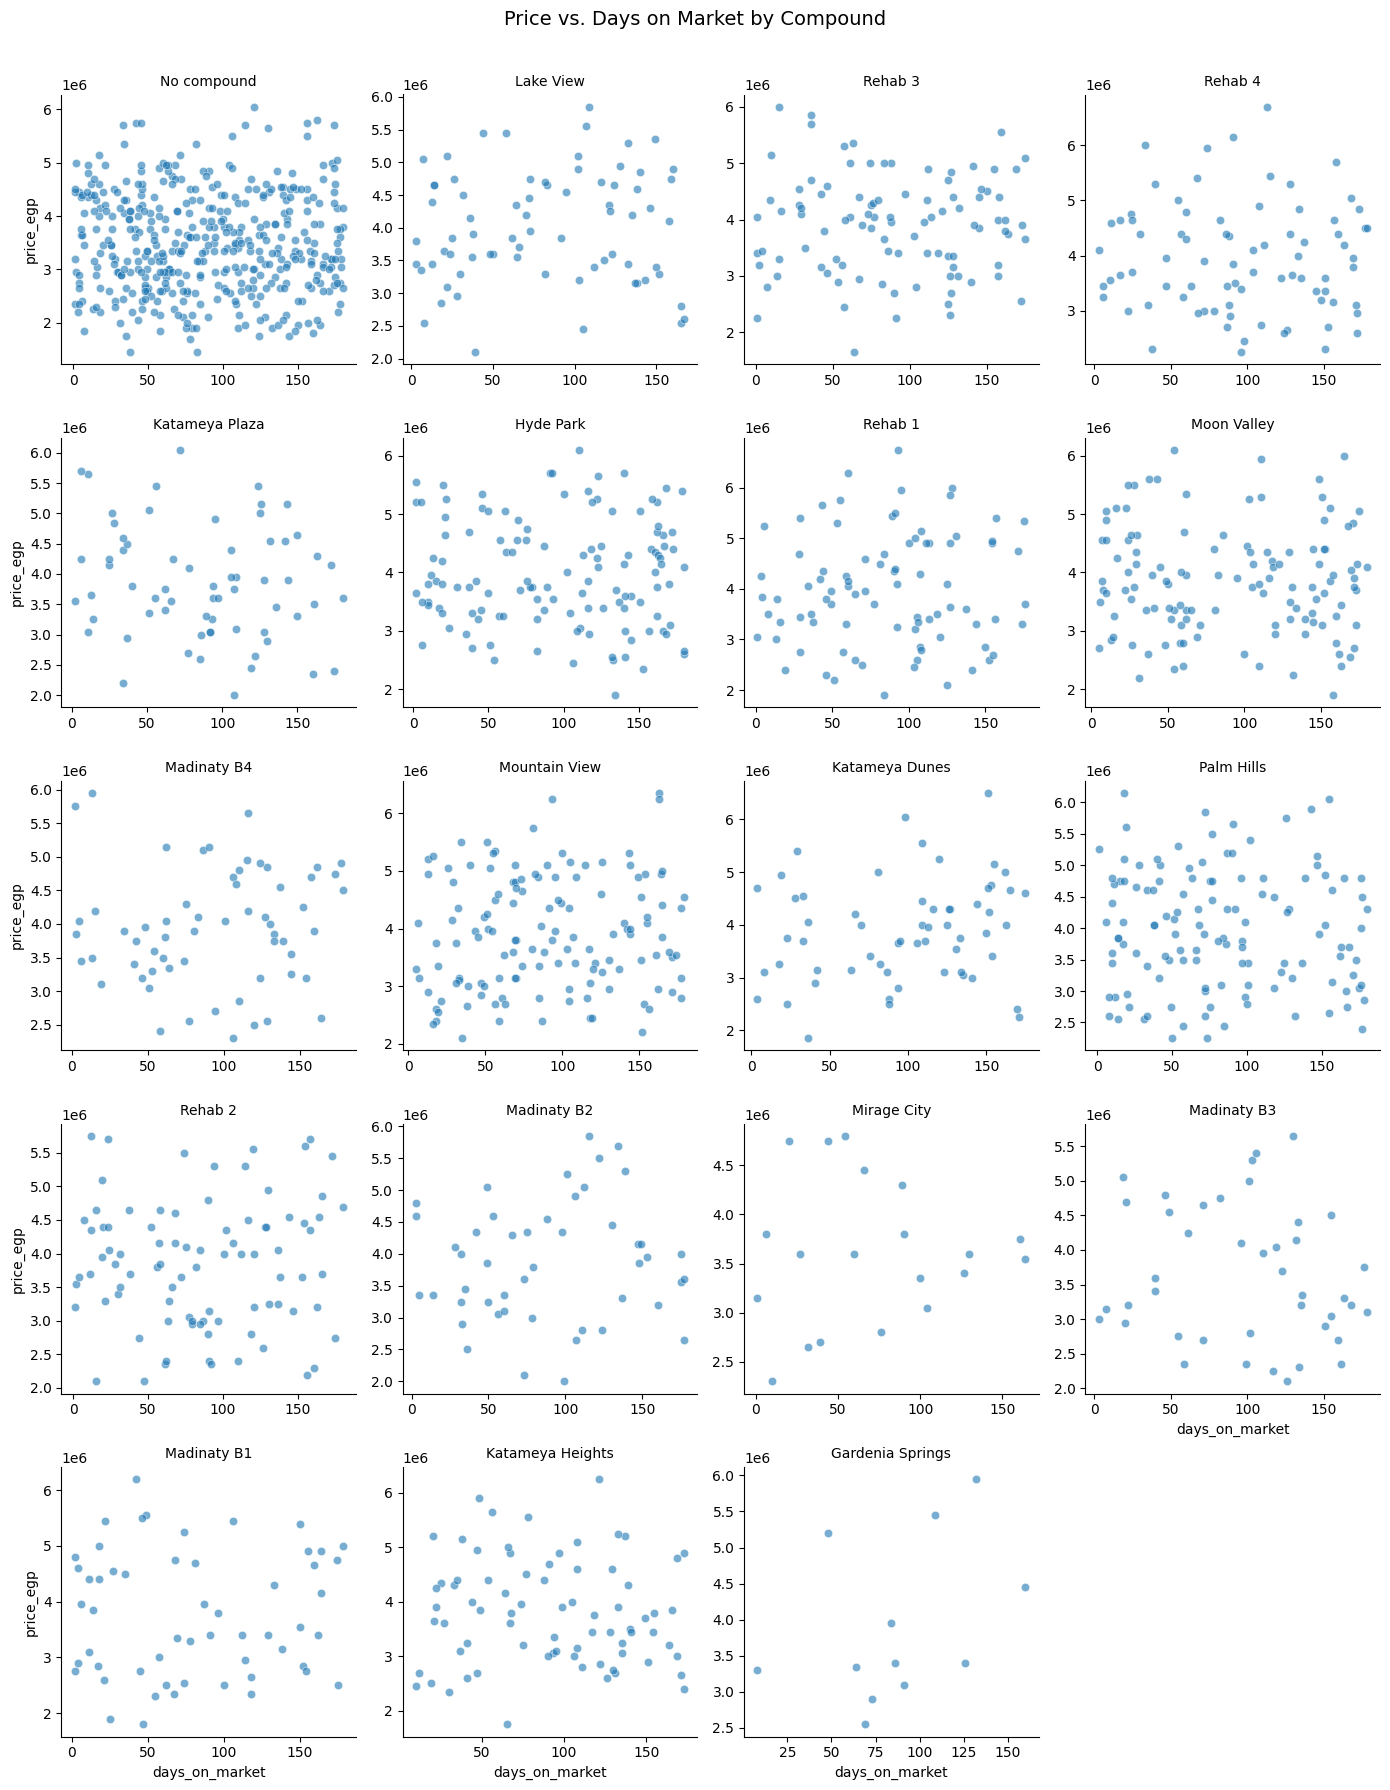

In [63]:
g = sns.FacetGrid(
    df,
    col="compound_name",
    col_wrap=4,  
    height=3.5,
    sharex=False,
    sharey=False
)
g.map_dataframe(sns.scatterplot, x="days_on_market", y="price_egp", alpha=0.6)
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price vs. Days on Market by Compound", fontsize=14, y=1.02)
plt.show()


## Drop Days on market as it will not be useful

In [64]:
df.drop(columns="days_on_market",inplace = True)

C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_1932\521189278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="days_on_market",inplace = True)


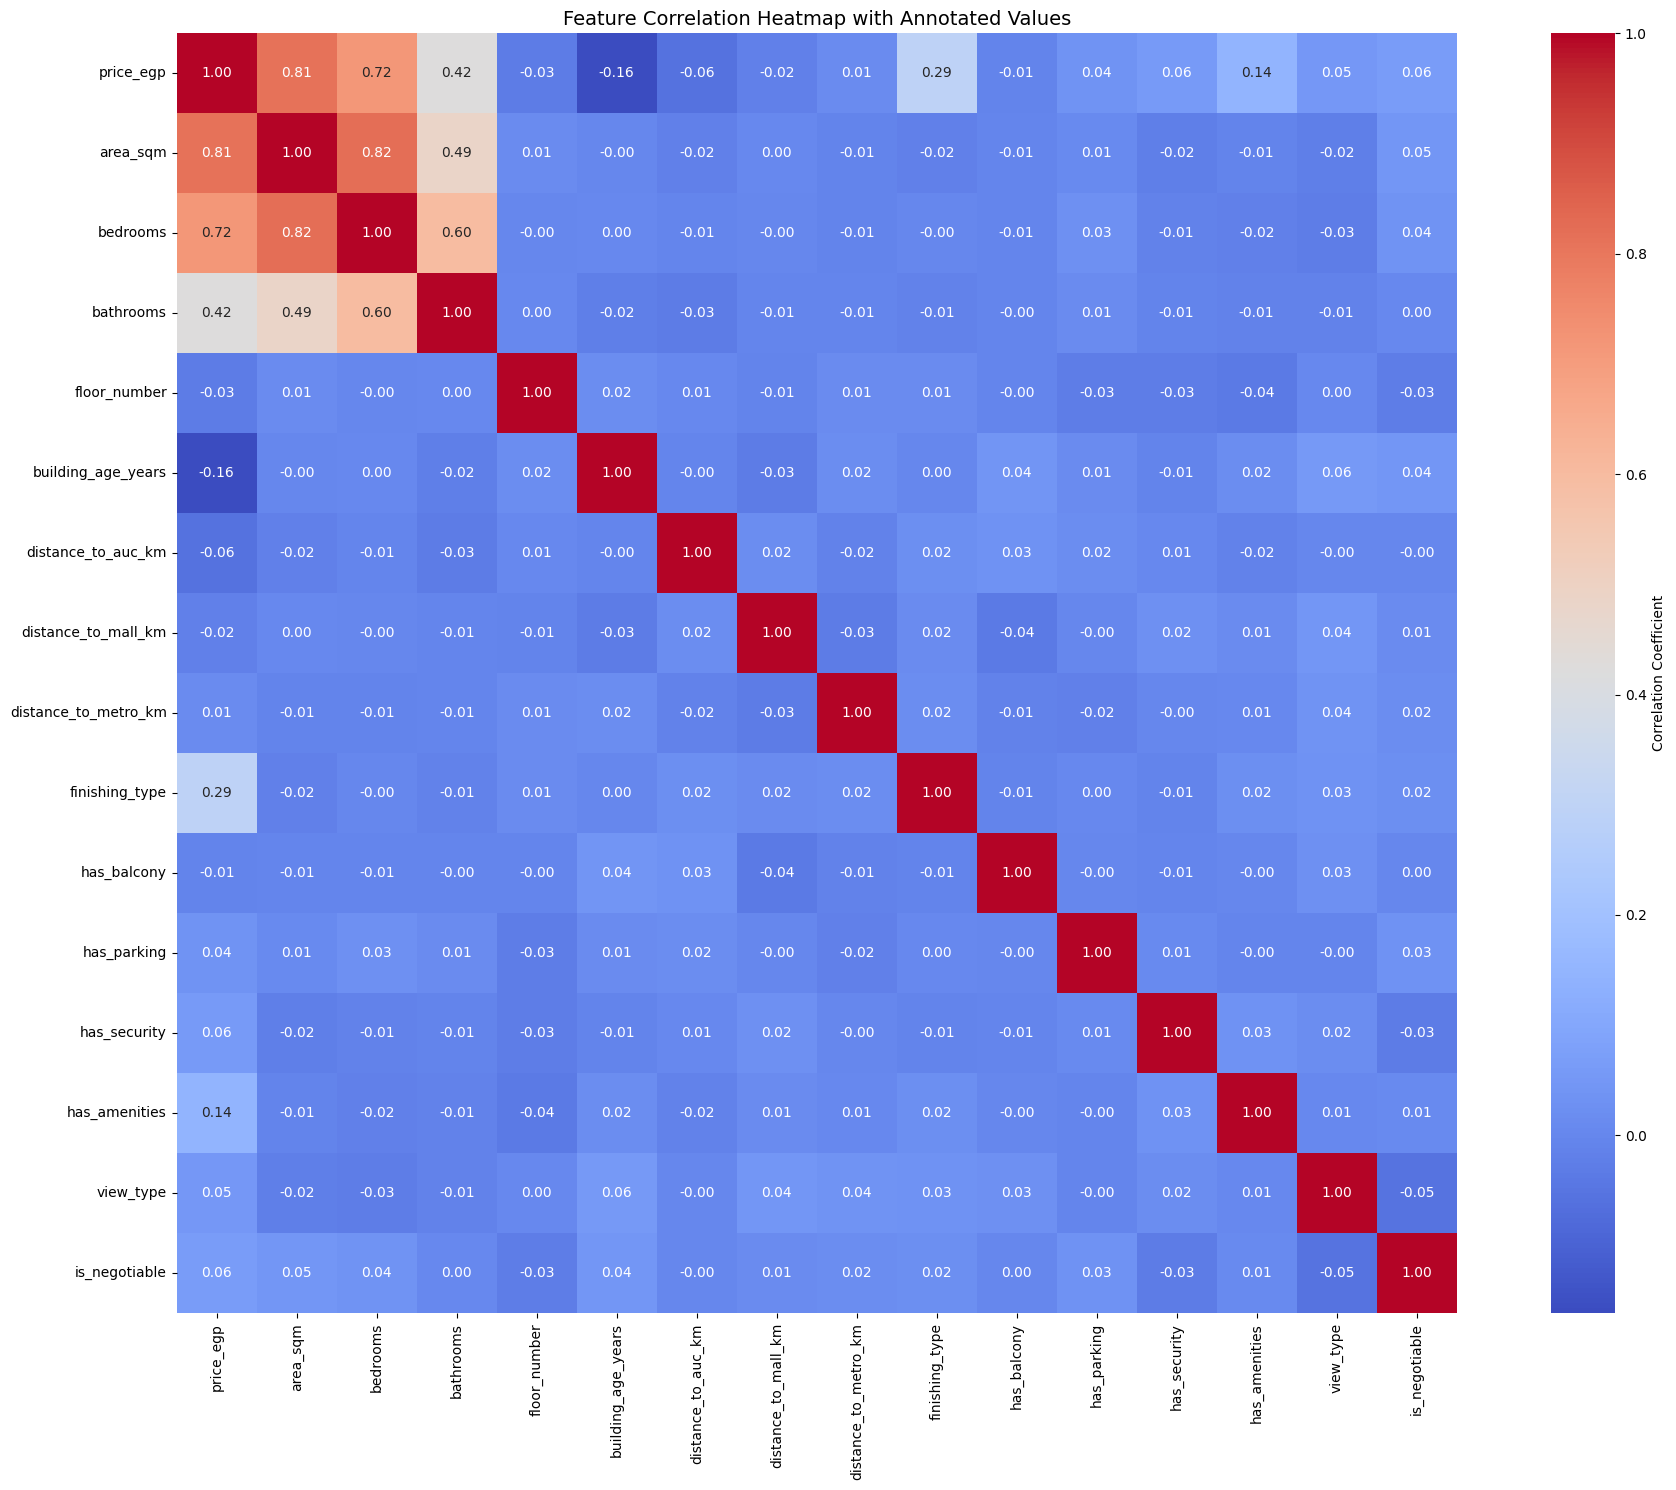

In [65]:
num_df = df.select_dtypes(include=["number"])

corr_matrix = num_df.corr()
target_corr = corr_matrix["price_egp"].sort_values(ascending=False)

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,         
    fmt=".2f",           
    square=True,
    cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Feature Correlation Heatmap with Annotated Values", fontsize=14)
plt.tight_layout()
plt.show()

In [66]:
df

,price_egp,area_sqm,bedrooms,bathrooms,floor_number,building_age_years,district,compound_name,distance_to_auc_km,distance_to_mall_km,distance_to_metro_km,finishing_type,has_balcony,has_parking,has_security,has_amenities,view_type,seller_type,is_negotiable
listing_id,,,,,,,,,,,,,,,,,,,
NCR-2024-00001,3650000,145,3,2,12,18,Madinaty,No compound,15.9,2.1,13.1,3,1,1,1,0,2,Broker,1
NCR-2024-00002,3900000,155,3,3,15,17,Fifth Settlement,No compound,23.8,3.0,6.4,3,1,1,1,1,3,Broker,1
NCR-2024-00003,2650000,109,2,3,5,14,Rehab City,No compound,9.8,7.7,9.9,3,1,1,1,1,2,Broker,1
NCR-2024-00004,5450000,219,3,4,10,1,Katameya,Lake View,4.5,4.4,4.5,3,1,1,1,1,1,Broker,1
NCR-2024-00005,2450000,96,2,3,4,13,Rehab City,Rehab 3,13.6,3.5,11.3,3,1,0,1,0,1,Owner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR-2024-01996,3600000,121,2,3,9,4,Rehab City,No compound,9.7,4.0,11.5,3,0,1,1,1,1,Broker,1
NCR-2024-01997,2300000,94,2,3,6,16,Rehab City,Rehab 1,6.8,7.0,14.9,2,1,0,1,1,2,Owner,1
NCR-2024-01998,4100000,156,3,2,5,3,Katameya,Katameya Plaza,20.4,4.3,11.3,4,1,1,0,0,2,Owner,1


In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

X = df.drop(columns=["price_egp"])
y = df["price_egp"]

numeric_features = [
    "area_sqm", "floor_number", "distance_to_auc_km", "distance_to_mall_km",
    "distance_to_metro_km", "building_age_years", "bedrooms", "bathrooms"
]
categorical_features = ["district" ,"seller_type","compound_name"]

numeric_transformer = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training R²: {r2_train:.4f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}")
print(f"Test R²:     {r2_test:.4f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}")

scores = cross_val_score(model, X, y, scoring="r2", cv=5)
print(f"Cross-Validation R²: {scores.mean():.4f} ± {scores.std():.4f}")


Training R²: 0.7324, MAE: 395958.41, MSE: 241513410190.84
Test R²:     0.7448, MAE: 409566.50, MSE: 252818106936.00
Cross-Validation R²: 0.7150 ± 0.0188


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import pandas as pd


X = df.drop(columns=["price_egp"])
y = df["price_egp"]

numeric_features = [
    "area_sqm", "floor_number", "distance_to_auc_km", "distance_to_mall_km",
    "distance_to_metro_km", "building_age_years", "bedrooms", "bathrooms"
]
categorical_features = ["district", "seller_type","compound_name"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.015,
    max_depth=3,          
    min_child_weight=15,  
    subsample=0.6,        
    colsample_bytree=0.6,
    reg_alpha=8,
    reg_lambda=15,
    gamma=0.5,
    eval_metric="mae",
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)



xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)


y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


print(f"Training R²: {r2_train:.4f}, MAE: {mae_train:,.0f}, MSE: {mse_train:,.0f}")
print(f"Test R²:     {r2_test:.4f}, MAE: {mae_test:,.0f}, MSE: {mse_test:,.0f}")



Training R²: 0.7876, MAE: 351,902, MSE: 191,708,545,024
Test R²:     0.7436, MAE: 407,062, MSE: 253,992,402,944


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
import pandas as pd

X = df.drop(columns=["price_egp"])
y = df["price_egp"]

numeric_features = [
    "area_sqm", "floor_number", "distance_to_auc_km", "distance_to_mall_km",
    "distance_to_metro_km", "building_age_years", "bedrooms", "bathrooms"
]
categorical_features = ["district", "seller_type","compound_name"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, shuffle=True)

lgbm_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.015,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=5,
    reg_lambda=10,
    objective="regression",
    random_state=42,
    n_jobs=-1
)

lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mae")


y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}, MAE: {mean_absolute_error(y_train, y_train_pred):,.0f}, MSE: {mean_squared_error(y_train, y_train_pred):,.0f}")
print(f"Test R²:     {r2_score(y_test, y_test_pred):.4f}, MAE: {mean_absolute_error(y_test, y_test_pred):,.0f}, MSE: {mean_squared_error(y_test, y_test_pred):,.0f}")




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 1431, number of used features: 30
[LightGBM] [Info] Start training from score 3802026.554857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

d:\Anaconda\envs\depi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\depi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [70]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df.drop(columns=["price_egp"])
y = df["price_egp"]

categorical_features = ["district","seller_type","finishing_type","view_type","compound_name"]
X[categorical_features] = X[categorical_features].astype("category")

x_train, x_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=42, test_size=0.2
)

cat_model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=3,
    l2_leaf_reg=6,
    subsample=0.8,
    bagging_temperature= 0.5,
    random_strength=0.8,
    loss_function="MAE",
    eval_metric="MAE",
    verbose=False,
    random_seed=42
)

cat_model.fit(x_train, y_train, cat_features=categorical_features, eval_set=(x_test, y_test))

y_train_pred = cat_model.predict(x_train)
y_test_pred = cat_model.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training R²: {r2_train:.4f}, MAE: {mae_train:.2f}")
print(f"Test R²:     {r2_test:.4f}, MAE: {mae_test:.2f}")



Training R²: 0.8751, MAE: 260120.62
Test R²:     0.8702, MAE: 284065.07


In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}, MAE: {mean_absolute_error(y_train, y_train_pred):,.0f}, MSE: {mean_squared_error(y_train, y_train_pred):,.0f}")
print(f"Test R²:     {r2_score(y_test, y_test_pred):.4f}, MAE: {mean_absolute_error(y_test, y_test_pred):,.0f}, MSE: {mean_squared_error(y_test, y_test_pred):,.0f}")


Training R²: 0.8475, MAE: 295,927, MSE: 137,647,553,059
Test R²:     0.7100, MAE: 431,286, MSE: 287,233,515,359
